# Trabajo 1
Aris Vazdekis Soria y Alejandra Ruiz de Adana Fleitas

# Leer archivo Fasta

In [6]:
# Importar el módulo necesario
def leer_fasta(ruta_archivo):
    # Inicializar una variable para almacenar la secuencia
    secuencia = ""
    
    # Abrir el archivo FASTA en modo lectura
    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            # Ignorar las líneas que comienzan con '>'
            if not linea.startswith('>'):
                # Agregar la línea a la secuencia, eliminando espacios en blanco                
                secuencia += linea.strip()  # strip() elimina espacios y saltos de línea
    
    return secuencia

# Usar la función
ruta_archivo = r'C:\Users\Usuario\Desktop\UNIVERSIDAD\CUARTOANO\PRIMERCUATRI\BIO\INS_Insulina.fa'
secuencia_adn = leer_fasta(ruta_archivo)

# Imprimir la secuencia
print(secuencia_adn)


GGAGAGCCACTGCATGCTGGGCCTGGCCGGCGTTGGCACCTGTGGGCACCCAGAGAGCGTGGAGAGAGCTGGGAGGGGCTCACAACAGTGCCGGGAAGTGGGGCTTGGCCCAGGGCCCCCAAGACACACAGACGGCACAGCAGGGCTGGTTCAAGGGCTTTATTCCATCTCTCTCGGTGCAGGAGGCGGCGGGTGTGGGGCTGCCTGCGGGCTGCGTCTAGTTGCAGTAGTTCTCCAGCTGGTAGAGGGAGCAGATGCTGGTACAGCATTGTTCCACAATGCCACGCTTCTGCAGGGACCCCTCCAGGGCCAAGGGCTGCAGGCTGCCTGCACCAGGGCCCCCGCCCAGCTCCACCTGCCCCACTGCCAGGACGTGCCGCGCAGAGCAGGTTCCGGAACAGCGGCGAGGCAGAGGGACACAGGAGGACACAGTCAGGGAGACACAGTGCCCGCCTGCCCGCCAGCCCTAGGTCGCACTCCCACCCATCTCCAGCCGGGCTGGACCCAGGTTAGAGGGAGGGTCACCCACACTGGGTGTGGACCTACAGGCCCCAACGCCCACATGTCCCACCTCCTTCCCCCGCCCCGGGGCAGCGTCACAGTGGGAGCCTGAACAGGTGATCCCAGTACTTCTCCCCAGGGCCTGTCCCCAGCATCTTCCCCATCTCCTGACTATGGAGCTGCCGTGAGGCCTGGCGACAGGGGTCTGGCCCACTCAGGCAGGCAGCCACGCCCTCCTCCGGGCGTGATGGGGTGTTCGCCCAGAGGCAGGCAGCGTGGGGCACCCTGTGACCCCAGGTCACCCAGGACTTTACTTAACAAAACACTTGAATCTGCGGTCATCAAATGAGGGTGGAGAAATGGGCTGCGGGGCATTTGTTTGAGGGGCGAGTGGAGGGAGGAGCGTGCCCACCCTCTGATGTATCTCGGGGCTGCCGAAGCCAACACCGTCCTCAGGCTGAGATTCTGACTGGGCCACAGGGAGCTGGTCACTTTTAGG

# Replicación

Cadena original de ADN: GGAGAGCCACTGCATGCTGGGCCTGGCCGGCGTTGGCACCTGTGGGCACCCAGAGAGCGTGGAGAGAGCTGGGAGGGGCTCACAACAGTGCCGGGAAGTGGGGCTTGGCCCAGGGCCCCCAAGACACACAGACGGCACAGCAGGGCTGGTTCAAGGGCTTTATTCCATCTCTCTCGGTGCAGGAGGCGGCGGGTGTGGGGCTGCCTGCGGGCTGCGTCTAGTTGCAGTAGTTCTCCAGCTGGTAGAGGGAGCAGATGCTGGTACAGCATTGTTCCACAATGCCACGCTTCTGCAGGGACCCCTCCAGGGCCAAGGGCTGCAGGCTGCCTGCACCAGGGCCCCCGCCCAGCTCCACCTGCCCCACTGCCAGGACGTGCCGCGCAGAGCAGGTTCCGGAACAGCGGCGAGGCAGAGGGACACAGGAGGACACAGTCAGGGAGACACAGTGCCCGCCTGCCCGCCAGCCCTAGGTCGCACTCCCACCCATCTCCAGCCGGGCTGGACCCAGGTTAGAGGGAGGGTCACCCACACTGGGTGTGGACCTACAGGCCCCAACGCCCACATGTCCCACCTCCTTCCCCCGCCCCGGGGCAGCGTCACAGTGGGAGCCTGAACAGGTGATCCCAGTACTTCTCCCCAGGGCCTGTCCCCAGCATCTTCCCCATCTCCTGACTATGGAGCTGCCGTGAGGCCTGGCGACAGGGGTCTGGCCCACTCAGGCAGGCAGCCACGCCCTCCTCCGGGCGTGATGGGGTGTTCGCCCAGAGGCAGGCAGCGTGGGGCACCCTGTGACCCCAGGTCACCCAGGACTTTACTTAACAAAACACTTGAATCTGCGGTCATCAAATGAGGGTGGAGAAATGGGCTGCGGGGCATTTGTTTGAGGGGCGAGTGGAGGGAGGAGCGTGCCCACCCTCTGATGTATCTCGGGGCTGCCGAAGCCAACACCGTCCTCAGGCTGAGATTCTGACTGGGC

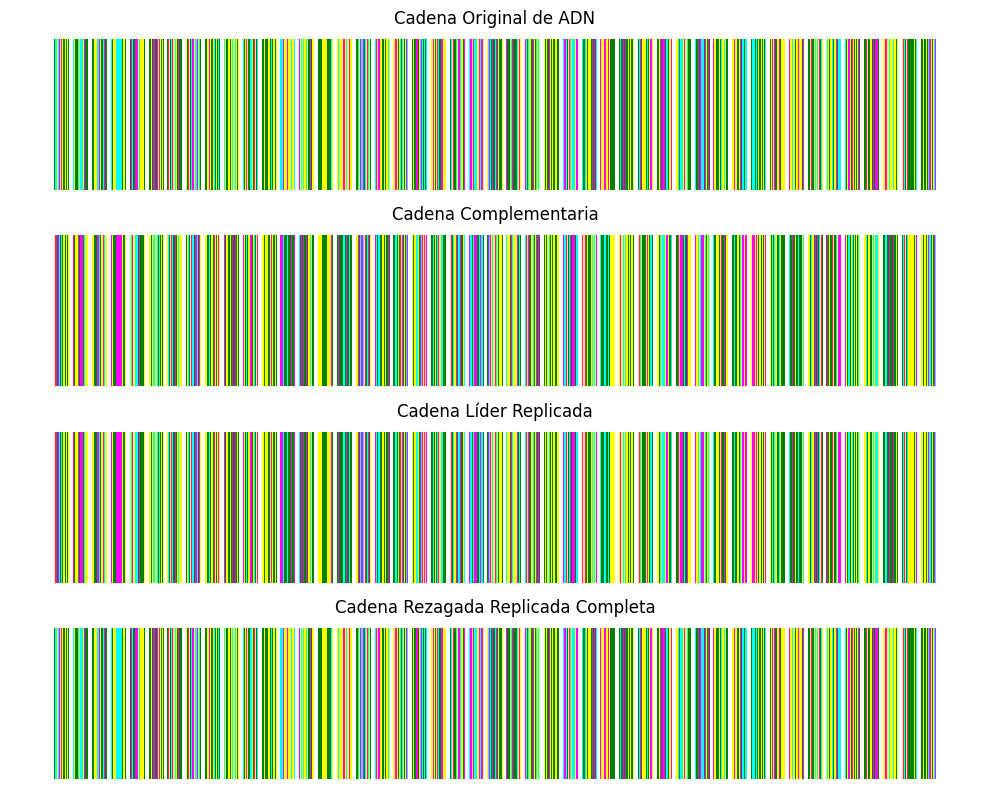

In [7]:
import random
import matplotlib.pyplot as plt

# Complementar bases
def complementar(base):
    complementos = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return complementos[base]

# Función para generar la cadena complementaria de ADN
def cadena_complementaria(cadena_adn1):
    cadena_comp = ''
    for base in cadena_adn1:
        cadena_comp += complementar(base)
    return cadena_comp

# Función para replicar la cadena líder (continua)
def replicar_cadena_lider(cadena_adn1):
    cadena_lider = ''
    for base in cadena_adn1:
        cadena_lider += complementar(base)
    return cadena_lider

# Función para replicar la cadena rezagada (discontinua con fragmentos de Okazaki)
def replicar_cadena_rezagada(cadena_complementaria):
    fragmentos = []
    for i in range(0, len(cadena_complementaria), tamanio_fragmento):
        fragmento = cadena_complementaria[i:i + tamanio_fragmento]
        fragmento_replicado = ''
        for base in reversed(fragmento):
            fragmento_replicado += complementar(base)
        ordenar_fragmento = ''.join(reversed(fragmento_replicado))
        fragmentos.append(ordenar_fragmento)
    return ''.join(fragmentos)

# Poner cebador y replicar secuencialmente
def cebador_movible(cadena_adn, complementario, start, end):
    resultados = []
    start_copi = start
    
    # Lista para guardar las posiciones de los cebadores
    posiciones_cebadores = []

    # Replicación inicial LO QUE NO HAY ANTES DEL START
    if start > 0:
        start_cebador = start  # Hasta donde se debe replicar al principio
        cadena_lider_inicial = replicar_cadena_lider(cadena_adn[0:start_cebador])
        cadena_rezagada_inicial = replicar_cadena_rezagada(complementario[0:start_cebador])
        
        resultados.append((cadena_lider_inicial, cadena_rezagada_inicial))

    while start < len(cadena_adn):
        # Asegurarse de que el segmento a replicar no exceda la longitud de la cadena
        if end > len(cadena_adn):
            end = len(cadena_adn)

        if start >= len(cadena_adn):  # Asegúrate de que no exceda la longitud
            break

        cadena_lider = replicar_cadena_lider(cadena_adn[start:end])
        cadena_rezagada = replicar_cadena_rezagada(complementario[start:end])

        resultados.append((cadena_lider, cadena_rezagada))
        
        # Guardar las posiciones de los cebadores
        posiciones_cebadores.append((start, end))

        # Mostrar resultados intermedios
        print(f"Los cebadores se colocan en las posiciones {start} y {end}")
        print(f"La helicasa separa las cadenas formando una orquilla")
        print(f"El ADN polimerasa va haciendo la replicación")
        print(f"Cadena líder replicada: {cadena_lider}")
        print(f"Cadena rezagada replicada: {cadena_rezagada}")
        print("")  # Línea en blanco para separar cada paso

        # Actualizar el inicio para el siguiente ciclo
        start = end
        # Definir el nuevo final aleatorio dentro del rango permitido
        if start < len(cadena_adn):  # Solo asigna end si hay ADN restante para replicar
            end = random.randint(start + 1, min(start + max_length, len(cadena_adn)))

    if start_copi > 0:
        print(f"Cadena líder replicada inicial: {cadena_lider_inicial}")
        print(f"Cadena rezagada replicada inicial: {cadena_rezagada_inicial}")
        print("")  # Línea en blanco para separar cada paso

    # Al final, mostrar las cadenas completas
    cadena_lider_total = ''
    cadena_rezagada_total = ''
    for rl, _ in resultados:
        cadena_lider_total += rl
    for _, rz in resultados:
        cadena_rezagada_total += rz

    # Imprimir las cadenas replicadas completas antes de la visualización
    print(f"Cadena líder replicada completa: {cadena_lider_total}")
    print(f"Cadena rezagada replicada completa: {cadena_rezagada_total}")

    # Imprimir las posiciones de los cebadores
    print("Posiciones de los cebadores:", posiciones_cebadores)
    
    return cadena_lider_total, cadena_rezagada_total

# Visualización de la replicación
def mostrar_adn(cadena_original, cadena_complementaria, cadena_lider_total, cadena_rezagada_total):
    fig, ax = plt.subplots(4, 1, figsize=(10, 8))
    
    # Mostrar la cadena original
    ax[0].bar(range(len(cadena_original)), [1]*len(cadena_original), color=['cyan' if b == 'A' else 'magenta' if b == 'T' else 'yellow' if b == 'C' else 'green' for b in cadena_original])
    ax[0].set_title("Cadena Original de ADN")
    ax[0].axis('off')
    
    # Mostrar la cadena líder total
    ax[2].bar(range(len(cadena_lider_total)), [1]*len(cadena_lider_total), color=['cyan' if b == 'A' else 'magenta' if b == 'T' else 'yellow' if b == 'C' else 'green' for b in cadena_lider_total])
    ax[2].set_title("Cadena Líder Replicada")
    ax[2].axis('off')

    # Mostrar la cadena complementaria
    ax[1].bar(range(len(cadena_complementaria)), [1]*len(cadena_complementaria), color=['cyan' if b == 'A' else 'magenta' if b == 'T' else 'yellow' if b == 'C' else 'green' for b in cadena_complementaria])
    ax[1].set_title("Cadena Complementaria")
    ax[1].axis('off')

    # Mostrar la cadena rezagada total
    ax[3].bar(range(len(cadena_rezagada_total)), [1]*len(cadena_rezagada_total), color=['cyan' if b == 'A' else 'magenta' if b == 'T' else 'yellow' if b == 'C' else 'green' for b in cadena_rezagada_total])
    ax[3].set_title("Cadena Rezagada Replicada Completa")
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

# Generar cadenas
tamanio_fragmento = random.randint(1, 5)

# Solicitar entrada del usuario para los parámetros
start_pos = int(input("Introduce la posición inicial para crear la primer arquilla (número entero): "))
max_length = int(input("Introduce la longitud máxima de la primera orquilla (número entero): "))

complementaria = cadena_complementaria(secuencia_adn)

# Imprimir cadena original y complementaria
print(f"Cadena original de ADN: {secuencia_adn}")
print(f"Cadena complementaria: {complementaria}")
print("")  # Línea en blanco para separar cada paso


# Replicación con cebadores móviles
cadena_lider_total, cadena_rezagada_total = cebador_movible(secuencia_adn, complementaria, start_pos, max_length)

# Mostrar visualización
mostrar_adn(secuencia_adn, complementaria, cadena_lider_total, cadena_rezagada_total)



# Transcripción

In [8]:
# Complementar bases
def complementar_ARN(base):
    complementos = {'A': 'U', 'T': 'A', 'C': 'G', 'G': 'C'}
    return complementos[base]

# Función para generar la cadena complementaria de ADN
def transcripcion(cadena_molde, start, end):
    arn_transcrito = ''
    for base in cadena_molde[start:end]:
        arn_transcrito += complementar_ARN(base)
    
    return arn_transcrito

# Simulación de la transcripción
def simular_transcripcion(cadena_molde, promotor_inicio, long_max_arn):
    print(f"*** Etapa de Iniciación ***")
    print(f"La ARN polimerasa se une al promotor en la posición {promotor_inicio}.")
    print("La cadena de ADN se abre para que la transcripción inicie.")
    
    # Transcripción: elongación
    print(f"\n*** Etapa de Elongación ***")
    arn_transcrito = transcripcion(cadena_molde, promotor_inicio, promotor_inicio + long_max_arn)
    print(f"Transcrito de ARN: 5'-{arn_transcrito}-3' (en proceso de elongación)")

    # Terminación: al llegar al final
    print(f"\n*** Etapa de Terminación ***")
    print("Se ha llegado al terminador, y el ARN transcrito es liberado.")
    
    return arn_transcrito

# Definir la cadena molde (utilizamos la cadena complementaria para la transcripción)
cadena_molde = complementaria

# Solicitar entrada del usuario para los parámetros
promotor_inicio = int(input("Introduce la posición del promotor en la cadena molde(número entero): "))
long_max_arn = int(input("Introduce la longitud máxima del ARN transcrito(número entero): "))


# Simular la transcripción
arn_transcrito = simular_transcripcion(cadena_molde, promotor_inicio, long_max_arn)

print(f"\nARN final transcrito: 5'-{arn_transcrito}-3'")

*** Etapa de Iniciación ***
La ARN polimerasa se une al promotor en la posición 8.
La cadena de ADN se abre para que la transcripción inicie.

*** Etapa de Elongación ***
Transcrito de ARN: 5'-ACUGCAUGCUGGGCCUGGCCGGCGUUGGCACCUGUGGGCACCCAGAGAGCGUGGAGAGAGCUGGGAGGGGCUCACAACAG-3' (en proceso de elongación)

*** Etapa de Terminación ***
Se ha llegado al terminador, y el ARN transcrito es liberado.

ARN final transcrito: 5'-ACUGCAUGCUGGGCCUGGCCGGCGUUGGCACCUGUGGGCACCCAGAGAGCGUGGAGAGAGCUGGGAGGGGCUCACAACAG-3'


# Traducción

In [10]:
import re

# Función para eliminar intrones
def eliminar_intrones(arn_transcrito):
    # Definir el patrón para los intrones
    patron_intron = r'GU(.*?)AG'
    
    # Encontrar todos los intrones en la cadena de ARN
    intrones = re.findall(patron_intron, arn_transcrito.replace('\n', ''))
    
    # Extraer los exones eliminando los intrones
    exones = re.split(patron_intron, arn_transcrito)
    
    # Filtrar exones vacíos y unirlos en una sola cadena
    cadena_exones = ''.join([exon for exon in exones if exon])
    
    print(f"Cadena de ARNm: {arn_transcrito}")
    print("Le quitamos los intrones al ARNm quedandonos solo con los exones:")
    print(cadena_exones)
    
    return cadena_exones

# Función para traducir ARN a aminoácidos
def traducir_arn(cadena_arn):
    codon_dict = {
        'UUU': 'Fenilalanina', 'UUC': 'Fenilalanina', 'UUA': 'Leucina', 'UUG': 'Leucina',
        'UCU': 'Serina', 'UCC': 'Serina', 'UCA': 'Serina', 'UCG': 'Serina',
        'UAU': 'Tirosina', 'UAC': 'Tirosina', 'UAA': 'Codón de terminación', 'UAG': 'Codón de terminación',
        'UGU': 'Cisteína', 'UGC': 'Cisteína', 'UGA': 'Codón de terminación', 'UGG': 'Triptófano',
        'CUU': 'Leucina', 'CUC': 'Leucina', 'CUA': 'Leucina', 'CUG': 'Leucina',
        'CCU': 'Prolina', 'CCC': 'Prolina', 'CCA': 'Prolina', 'CCG': 'Prolina',
        'CAU': 'Histidina', 'CAC': 'Histidina', 'CAA': 'Glutamina', 'CAG': 'Glutamina',
        'CGU': 'Arginina', 'CGC': 'Arginina', 'CGA': 'Arginina', 'CGG': 'Arginina',
        'AUU': 'Isoleucina', 'AUC': 'Isoleucina', 'AUA': 'Isoleucina', 'AUG': 'Metionina (Inicio)',
        'ACU': 'Treonina', 'ACC': 'Treonina', 'ACA': 'Treonina', 'ACG': 'Treonina',
        'AAU': 'Asparagina', 'AAC': 'Asparagina', 'AAA': 'Lisina', 'AAG': 'Lisina',
        'AGU': 'Serina', 'AGC': 'Serina', 'AGA': 'Arginina', 'AGG': 'Arginina',
        'GUU': 'Valina', 'GUC': 'Valina', 'GUA': 'Valina', 'GUG': 'Valina',
        'GCU': 'Alanina', 'GCC': 'Alanina', 'GCA': 'Alanina', 'GCG': 'Alanina',
        'GAU': 'Ácido aspártico', 'GAC': 'Ácido aspártico', 'GAA': 'Ácido glutámico', 'GAG': 'Ácido glutámico',
        'GGU': 'Glicina', 'GGC': 'Glicina', 'GGA': 'Glicina', 'GGG': 'Glicina'
    }
    
    aminoacidos = []
    for i in range(0, len(cadena_arn), 3):
        codon = cadena_arn[i:i+3]
        aminoacidos.append(codon_dict.get(codon, 'Codón incompleto (ignorar)'))
    
    return aminoacidos

# Eliminar intrones
cadena_exones = eliminar_intrones(arn_transcrito)

# Traducir la cadena de exones
resultado_exones = traducir_arn(cadena_exones)

print("Aminoácidos correspondientes a la cadena de exones: ", resultado_exones)


Cadena de ARNm: ACUGCAUGCUGGGCCUGGCCGGCGUUGGCACCUGUGGGCACCCAGAGAGCGUGGAGAGAGCUGGGAGGGGCUCACAACAG
Le quitamos los intrones al ARNm quedandonos solo con los exones:
ACUGCAUGCUGGGCCUGGCCGGCUGGCACCUGUGGGCACCCAGAGCGGAGAGCUGGGAGGGGCUCACAACAG
Aminoácidos correspondientes a la cadena de exones:  ['Treonina', 'Alanina', 'Cisteína', 'Triptófano', 'Alanina', 'Triptófano', 'Prolina', 'Alanina', 'Glicina', 'Treonina', 'Cisteína', 'Glicina', 'Histidina', 'Prolina', 'Ácido glutámico', 'Arginina', 'Arginina', 'Alanina', 'Glicina', 'Arginina', 'Glicina', 'Serina', 'Glutamina', 'Glutamina']
